<a href="https://colab.research.google.com/github/Ochan-LOKIDORMOI/Sound_Clustering/blob/main/Ochan_LOKIDORMOI_Sound_clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

# **Importing Libraies**

In [3]:
#Make allNecessary Imports
import librosa
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os


# **Loading the data**

In [4]:
# Load the data
unlabelled_data_path = "/content/drive/MyDrive/unlabelled_sounds"

features = []
file_names = []

# **Features Extractions**

In [5]:
# Feature Extraction (Mel Spectrograms)
for file in os.listdir(unlabelled_data_path):
    if file.endswith(".wav"):
        file_path = os.path.join(unlabelled_data_path, file)
        y, sr = librosa.load(file_path)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        features.append(np.mean(mel_spec_db, axis=1))
        file_names.append(file)

features = np.array(features)

In [6]:
# Convert to DataFrame
df = pd.DataFrame(features)

# **Visualization Without Dimensionality**

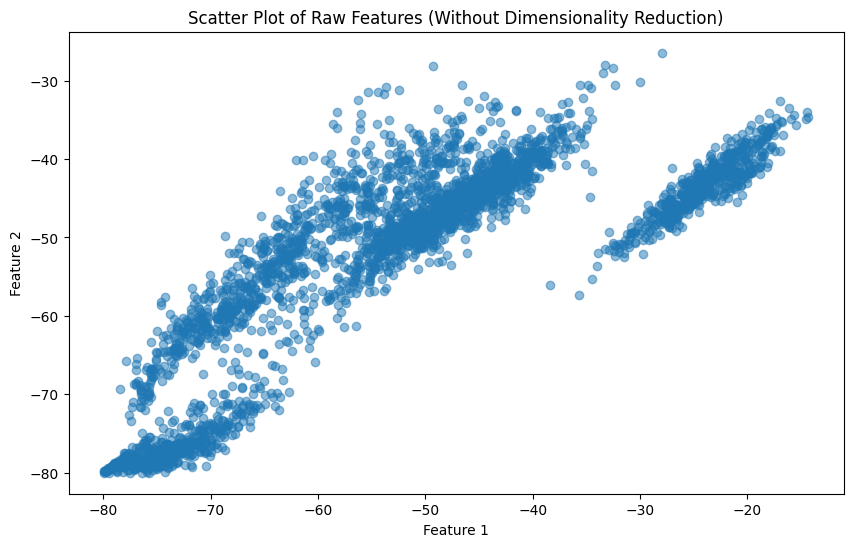

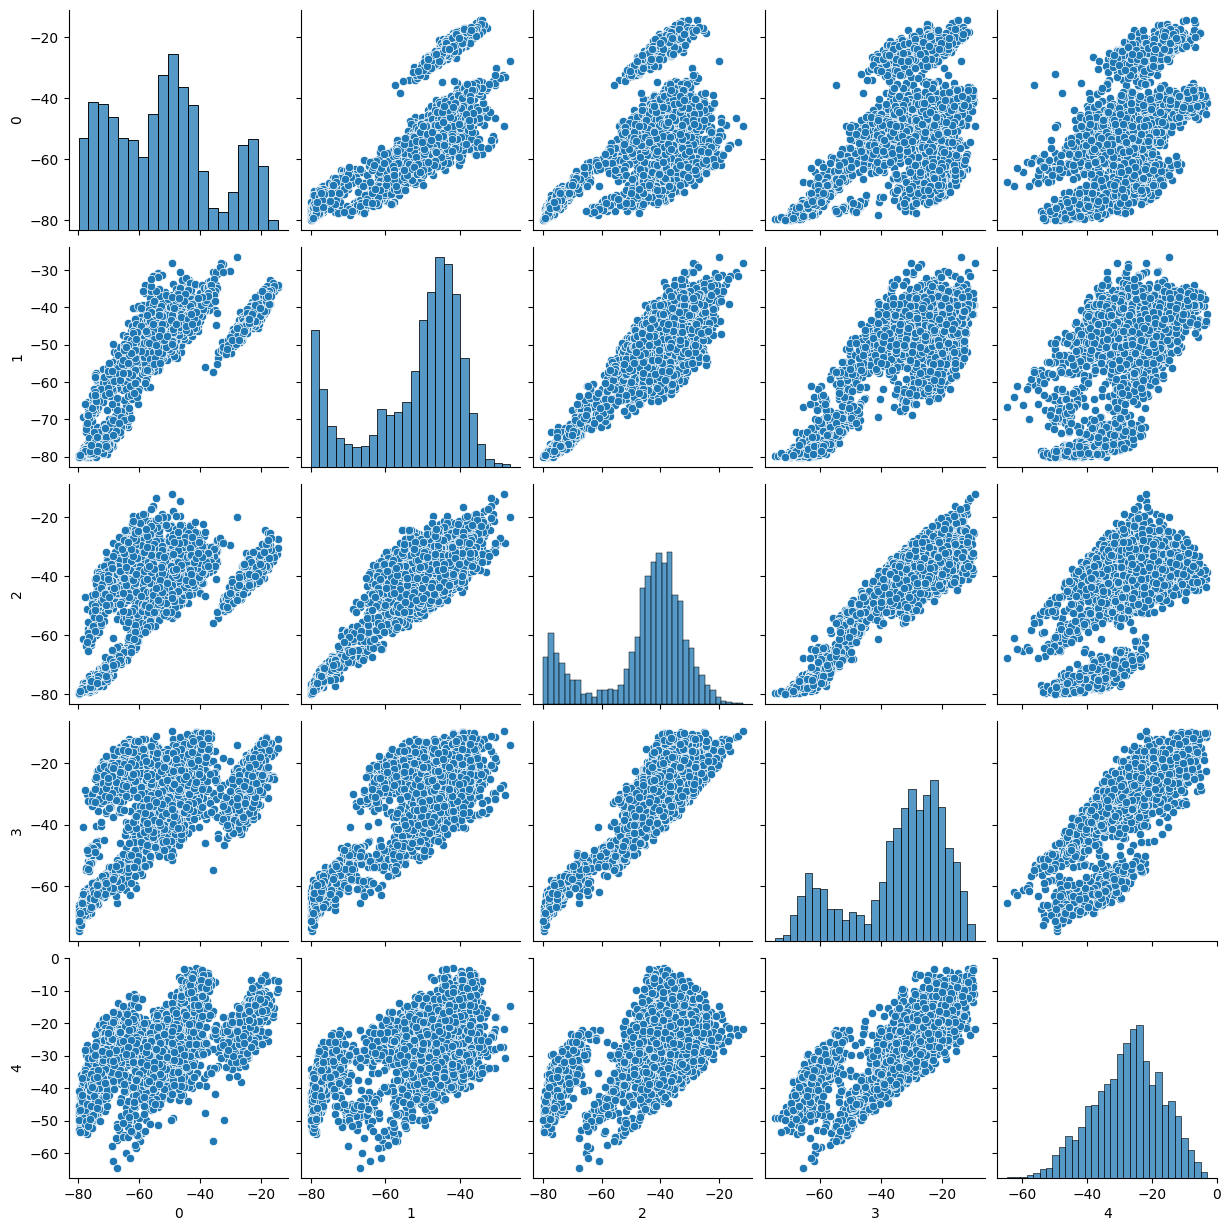

In [7]:
# Attempt visualization without dimensionality reduction
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.show()

# Pair plot (Only using first 5 features)
sns.pairplot(df.iloc[:, :5])
plt.show()

### Why is dimensionality reduction important?

- *Dimensionality reduction techniques like PCA and t-SNE help reduce the number of features while preserving the structure of the data, making it easier to visualize and analyze.*

(*Document any challenges/errors from the above experiments.*)

- *High-dimensional data (like Mel Spectrograms) is difficult to visualize and interpret directly as seen in the above scatter plots.*

- *Without dimensionality reduction, scatter plots and pair plots may not reveal meaningful patterns or clusters due to the curse of dimensionality.*



# **Applying PCA and t-SNE**

In [8]:

# Apply PCA (3 components)
pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)

# Apply t-SNE (3 components)
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_features = tsne.fit_transform(features)


# **3D Visualizations**

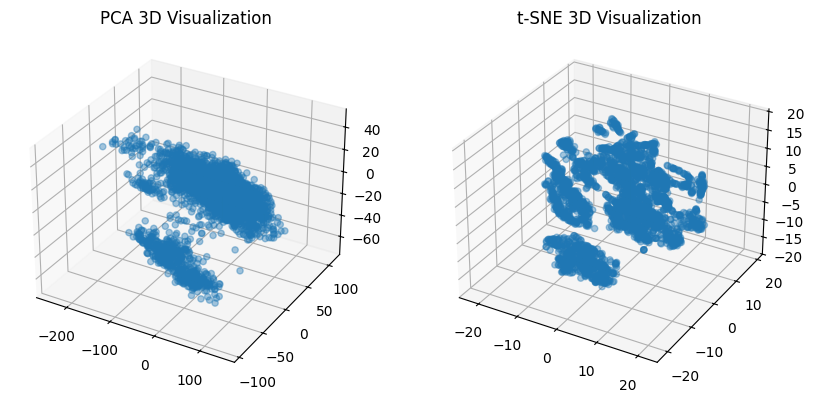

In [9]:
# 3D Visualization of PCA
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], alpha=0.4)
ax.set_title("PCA 3D Visualization")

# 3D Visualization of t-SNE
ax = fig.add_subplot(122, projection='3d')
ax.scatter(tsne_features[:, 0], tsne_features[:, 1], tsne_features[:, 2], alpha=0.4)
ax.set_title("t-SNE 3D Visualization")
plt.show()

### Which method (PCA or t-SNE) provides better separability of clusters and why?
*From the visualizations, t-SNE provides better separation of clusters than PCA.*

**Here is why**
- t-SNE (t-distributed Stochastic Neighbor Embedding) is a particularly useful algorithm in the context of dimensionality reduction for visualizing high-dimensional data.

- This preserves the local topology of the data, such that points that lie proximal to each other in high-dimensional space will remain proximal in lower-dimensional space. As we see from the graph, the t-SNE seems to create distinct, well-separated clusters.

 PCA(Principal Component Analysis) is a linear dimensionality reduction technique used to determine the principal components (directions of greatest variance) within the data.
 - It can be used to reduce dimensionality, but it may not maintain the local structure quite as well as t-SNE does, particularly for complex, non-linear datasets.
 - The PCA plot in the graph shows more overlapping clusters and less clear cluster separation than the t-SNE plot.

 In general, t-SNE is better at revealing the cluster structure in the data for visualization purposes, as evidenced by the clearer separation of clusters in the t-SNE plot compared to the PCA plot in your image.

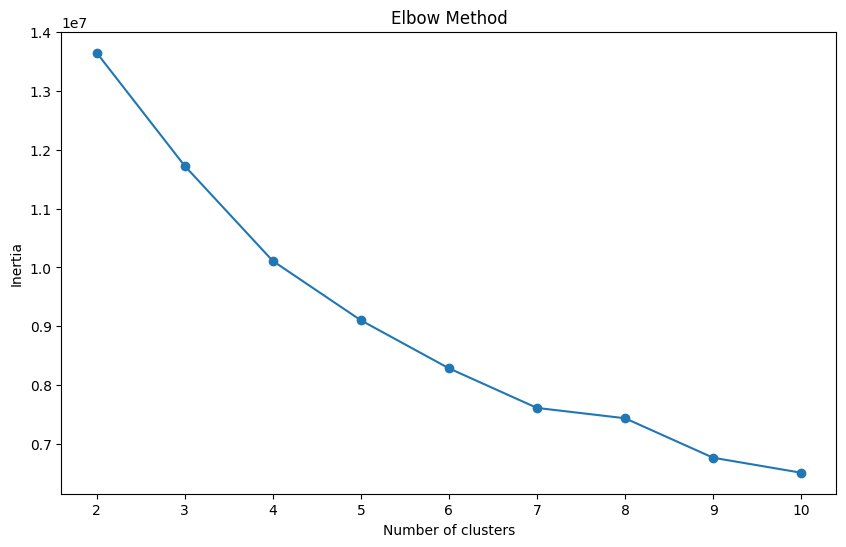

In [10]:

# Optimize number of clusters using Elbow Method
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



 The graph above plots the inertia (sum of squared distances to the nearest cluster center) against the number of clusters.

Based on the Elbow Method plot, the optimal number of clusters (K) appears to be 4.

**Here is why**

The Elbow Method looks for the point of inflection (the "elbow") in the plot of inertia versus the number of clusters.

 Inertia decreases as the number of clusters increases because each data point is closer to its centroid.

 However, after a certain point, adding more clusters provides diminishing returns, and the decrease in inertia becomes less significant. This point of diminishing returns is the "elbow."

In the above graph, there is decrease in inertia as you move from 2 to 3 to 4 clusters.

After K=4, the line becomes less steep, indicating that adding more clusters doesn't significantly reduce the inertia.

Therefore, K=4 is the point where adding more clusters provides less benefit, making it a good choice for the optimal number of clusters.

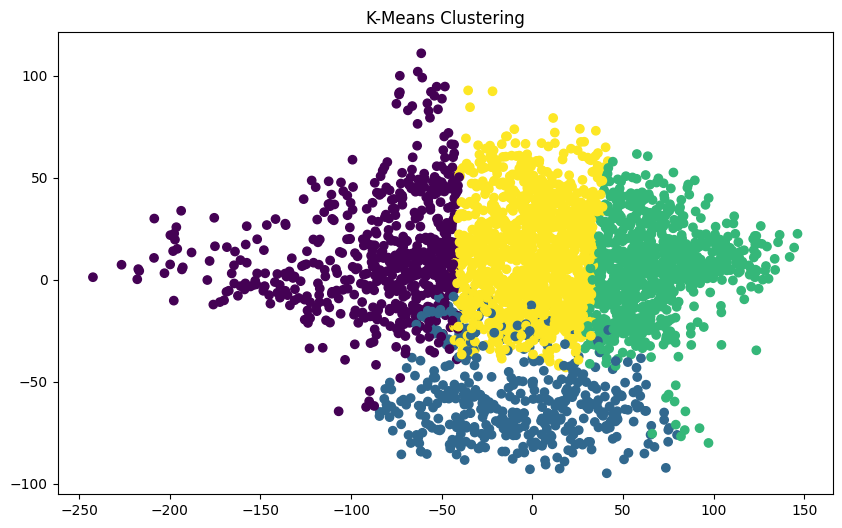

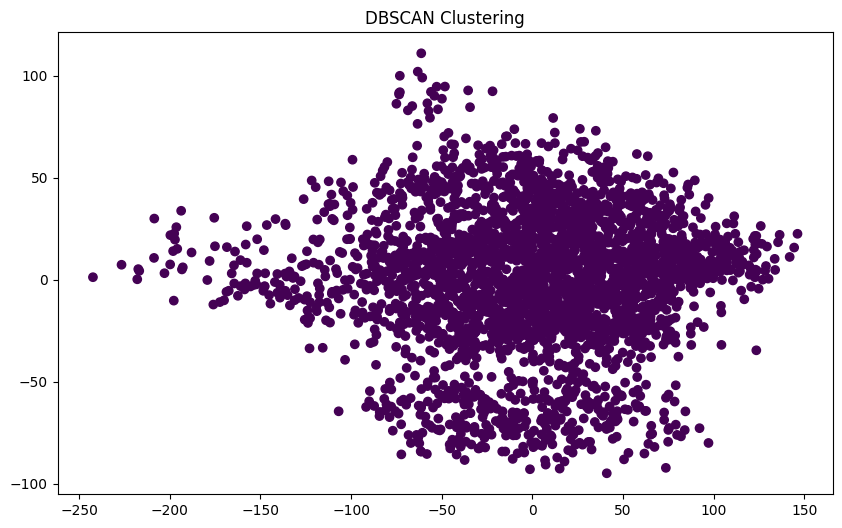

In [20]:

# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()


# Scatter Plot for DBSCAN Clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()


In [21]:

# Evaluate clustering
kmeans_silhouette = silhouette_score(pca_features, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_features, kmeans_labels)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(pca_features, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(pca_features, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")


K-Means - Silhouette Score: 0.3202, Davies-Bouldin Index: 1.0314
DBSCAN failed to form meaningful clusters.


### Discuss the results (max 5 lines)
(*Compare K-Means and DBSCAN performance based on the outputs.*)

**K-Means Performance:** A Silhouette Score of 0.3202 suggests the clusters are moderately separated.

A value closer to 1 implies the clusters are well separated, and the closer closer to 0 signifies that the clusters overlap. A Davies-Bouldin Index of 1.0314 indicates that the clusters have a moderate degree of overlap and that the data points within each cluster are on average, more similar to one another than to data points in other clusters.
The Davies-Bouldin Index lower values are better.

**DBSCAN Failure:** DBSCAN not being able to form meaningful clusters could be a reason that there are no well-defined density-based regions in the data, or it could also be the case that for the dataset itself, the hyperparameters for DBSCAN (epsilon and min_samples) were not set appropriately. This highlights the importance of using algorithms like K-means, because DBSCAN struggles.

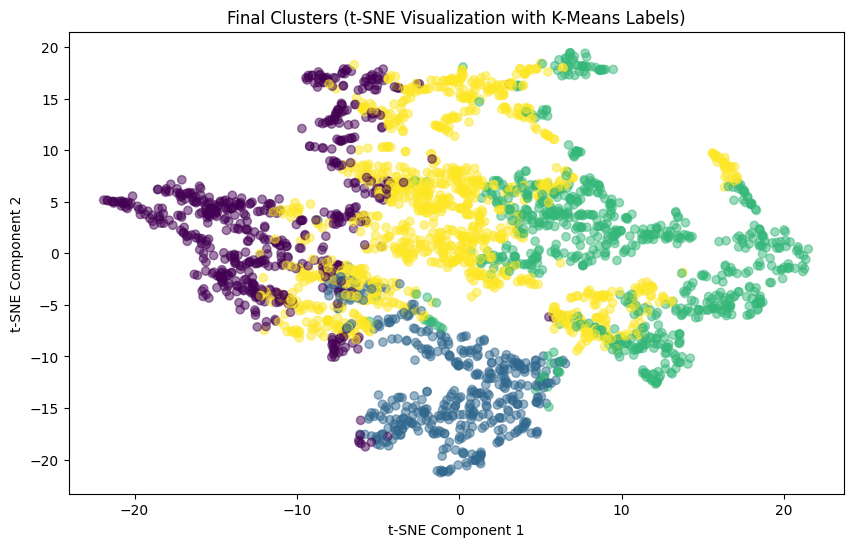

In [13]:

# Final visualization using t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.show()


### Final Analysis
- Explain why dimensionality reduction helped (or didn't) in clustering.
- Justify why certain clustering methods worked better.
- Relate findings to real-world clustering challenges.


t-SNE is a technique for reducing dimensions that excels at visualizing high-dimensional data in lower dimensions (3D) while maintaining local structures.
- Clustering algorithms often face challenges in high-dimensional spaces due to the "curse of dimensionality," where data becomes sparse and distance metrics lose their significance.
- By reducing the data to 3 t-SNE components, you've created a space where clusters can be more visually distinct, allowing K-Means to function more effectively.

 This visualization enables us to evaluate the quality of the clusters formed by K-means subjectively. Without it, we would only have cluster metrics like the Silhouette Score and Davies-Bouldin Index to depend on.

**Justify why certain clustering methods worked better.**

- K-Means may have performed better for a few reasons. While DBSCAN struggled and the silhouette score and Davies-Bouldin index weren't particularly impressive for K-means either, K-means consistently assigns points to clusters, regardless of whether the data forms clear density-based groups.

- DBSCAN, on the other hand, relies on distinct areas of high density to create clusters, which can be problematic if the data is more evenly spread out, as you've observed.
- Additionally, the t-SNE plot indicates that the clusters have intricate shapes and varying densities, whereas K-Means operates under the assumption that clusters are spherical and of similar size.

**Why DBSCAN failed**

- DBSCAN's failure indicates that the data might not have well-defined dense regions, or the parameters may not have been properly adjusted.

 Since the data exhibits very complex structures in the t-SNE components, identifying the appropriate values for eps and min_samples could be challenging.

**Relate findings to real-world clustering challenges.**

- **Non-Globular Clusters:** Non-globular shape clustering is detected by the t-SNE plot which indicates that the clusters are formed in other shapes that are non-globular. In actuality, data is hardly precise. This raises a familiar challenge, which is how K-Means that works with spherical clusters will not work with every dataset.

- **Parameter Tuning:** The problems you might encounter with tuning DBSCAN parameters capture another important problem in the real world. Most clustering techniques require high attention in setting hyperparameters, and these most appropriate values are not always the same for different datasets.


- **Feature Engineering & Scaling:** The low-moderate Silhouette Score and Davies-Bouldin Index confirm the assumption that the raw features are not suitable for clustering. As a rule, real data require feature engineering (creation of new variables based on existing ones) as well as scaling (normalization or standardization of existing variables) in order to increase clustering performance.
This is the process that will enable an algorithmic clustering solution to produce effective results.

*Resources to check more*

- [t-SNE and PCA](https://www.datacamp.com/tutorial/introduction-t-sne)
- [K-means for non-spherical (non-globular) clusters](https://stats.stackexchange.com/questions/144746/k-means-for-non-spherical-non-globular-clusters)

- [T-SNE Is Not Optimized to Reveal Clusters in Data](https://arxiv.org/abs/2110.02573)


**The END**


